In [31]:
from firedrake import *
from pyroteus import *
from pyroteus_adjoint import *
import matplotlib.pyplot as plt
from movement import *
%matplotlib inline

1.0 9.813880018267465


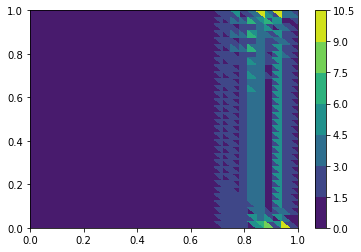

In [41]:
arr = np.fromfile("temp_arr")
n = 32
mesh = UnitSquareMesh(n, n, diagonal="left")
P0 = FunctionSpace(mesh, "DG", 0)
P1_vec = VectorFunctionSpace(mesh, "CG", 1)
P1_ten = TensorFunctionSpace(mesh, "CG", 1)
small_mesh = UnitSquareMesh(n//2, n//2, diagonal="left")
P0_small = FunctionSpace(small_mesh, "DG", 0)


def normalize(arr):
    return (arr - np.mean(arr)) / np.std(arr)

normed_arr = normalize(arr)
normed_arr -= np.min(normed_arr)
normed_arr += 1
print(np.min(normed_arr), np.max(normed_arr))


m = Function(P0, val=normed_arr)
tc = tricontourf(m)
plt.colorbar(tc)

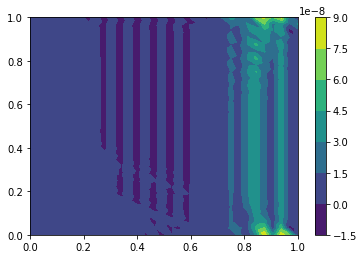

In [3]:
# P1 = FunctionSpace(mesh, "CG", 1)
# m_P1 = Function(P1)
# m_P1.project(m)
# tc = tricontourf(m_P1)
# plt.colorbar(tc)
# Let's try smoothing it? we don't exactly want negative values either

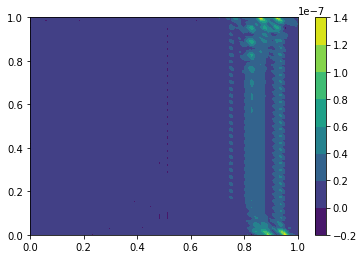

In [4]:
# P2 = FunctionSpace(mesh, "CG", 2)
# m_P2 = Function(P2)
# m_P2.project(m)
# tc = tricontourf(m_P2)
# plt.colorbar(tc)

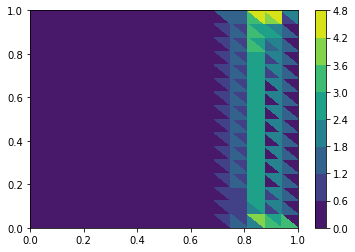

In [22]:
# small_monitor = Function(P0_small)
# small_monitor.project(m)
# tc = tricontourf(small_monitor)
# plt.colorbar(tc)

In [21]:
# dt = 0.03125
# dx = 0.001
# N = 1
# K = Constant(N * dx**2 / dt)
# v = TestFunction(m_P2.function_space())
# smooth_P2 = Function(m_P2.function_space())
# n = FacetNormal(mesh)
# # print(type(K * inner(grad(smooth_P2), grad(v)) * dx))
# a = inner((smooth_P2 - m_P2) / dt, v) * dx
# L = - K * inner(div(grad(m_P2)), v) * dx
# bcs = []
# print(type(F))
# solve(a == L, smooth_P2, bcs=bcs)
# tc = tricontourf(smooth_P1)
# plt.colorbar(tc)

NameError: name 'm_P2' is not defined

In [48]:
# def ring_monitor(mesh):
#     alpha = Constant(20.0)  # amplitude
#     beta = Constant(200.0)  # width
#     gamma = Constant(0.15)  # radius
#     x, y = SpatialCoordinate(mesh)
#     r = (x - 0.5)**2 + (y - 0.5)**2
#     print(type(Constant(1.0) + alpha/cosh(beta*(r - gamma))**2))
#     return Constant(1.0) + alpha/cosh(beta*(r - gamma))**2

def dummy(mesh):
    P0 = FunctionSpace(mesh, "DG", 0)
    m_small = Function(P0)
    m_small.project(m)
    return m_small

mover = MongeAmpereMover(small_mesh, dummy, method="quasi_newton", maxiter=1000, rtol=1e-3)

In [49]:
mover.move();

   0   Min/Max 1.7632e-01   Residual 4.1420e-01   Equidistribution 9.8894e-01
   1   Min/Max 1.3290e-01   Residual 2.9354e-01   Equidistribution 9.9227e-01
   2   Min/Max 3.0538e-01   Residual 1.8883e-01   Equidistribution 9.9460e-01
   3   Min/Max 5.8088e-01   Residual 7.7034e-02   Equidistribution 9.9611e-01
   4   Min/Max 5.8458e-01   Residual 3.5395e-02   Equidistribution 9.9624e-01
   5   Min/Max 5.7104e-01   Residual 1.4301e-02   Equidistribution 9.9618e-01
   6   Min/Max 5.7537e-01   Residual 4.8604e-03   Equidistribution 9.9623e-01
Converged in 6 iterations.


In [50]:
def plot_mesh(mesh, fig=None, axes=None, **kwargs):
    kwargs.setdefault("interior_kw", {"linewidth": 0.5})
    kwargs.setdefault("boundary_kw", {"linewidth": 2.0})
    if fig is None and axes is None:
        fig, axes = plt.subplots(figsize=(5, 5))
    tp = triplot(mesh, axes=axes, **kwargs)
    axes.axis(False)
    return fig, axes, tp
# plot_mesh(mover.mesh);

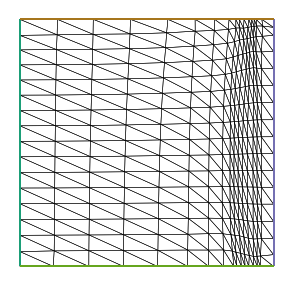

In [51]:
plot_mesh(small_mesh);

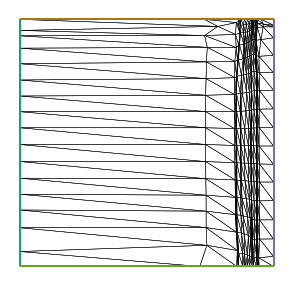

In [40]:
# mover.mesh.coordinates.assign(mover.x)
# plot_mesh(small_mesh);